## **Оглавление**

### 1.[Введение](#1)
### 2. [Обзор данных](#2)
### 3. [Предобработка данных](#3)
    3.1 Изменение названий столбцов
    3.2 Изменение типов данных
    3.3 Поиск и обработка некорректных значений
    3.4 Поиск и обработка дубликатов
    3.5 Создание функций
### 4. [Исследовательский анализ данных](#4)
    4.1 Профили пользователей
    4.2 Бизнес-показатели
    4.3 Расчет САС
    4.4 Оценка окупаемости рекламы
    4.5 Оценка конверсии и Retention Rate
### 5. [Итоги исследования](#5)

# Проектная работа: изучение причин убытков компании

## Введение <a id='1'></a> 

Развлекательное приложение Procrastinate Pro+ делает огромные вложения в рекламу, но несмотря на это последние несколько месяцев компания терпит убытки.  

**Цель:** разобраться в причинах убытков и помочь компании выйти в плюс.  

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года: лог сервера с данными об их посещениях, выгрузка их покупок за этот период, рекламные расходы.

Исследование проводится в три этапа:

1. Обзор данных
2. Предобработка данных
3. Исследовательский анализ данных

## Обзор данных  <a id='2'></a>

Ознакомимся с входными данными.

In [1]:
#импортируем библиотеки

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from datetime import date
from matplotlib import pyplot as plt

In [2]:
#игнорируем предупреждения
import warnings

warnings.filterwarnings('ignore') 

Прочитаем файлы с данными.

In [3]:
#прочитаем файлы с данными и сохраним их в переменные

visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),  # журнал сессий
    pd.read_csv('/datasets/orders_info_short.csv'),  # покупки
    pd.read_csv('/datasets/costs_info_short.csv'),  # траты на рекламу
)

In [4]:
display(visits.head()) #выведем на экран первые 5 строк таблицы visits
display(orders.head()) #выведем на экран первые 5 строк таблицы orders
display(costs.head()) #выведем на экран первые 5 строк таблицы costs

display(visits.info()) #получим общую информацию о таблице visits
display(orders.info()) #получим общую информацию о таблице orders
display(costs.info()) #получим общую информацию о таблице costs

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
User Id          309901 non-null int64
Region           309901 non-null object
Device           309901 non-null object
Channel          309901 non-null object
Session Start    309901 non-null object
Session End      309901 non-null object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
User Id     40212 non-null int64
Event Dt    40212 non-null object
Revenue     40212 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
dt         1800 non-null object
Channel    1800 non-null object
costs      1800 non-null float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

В наличии следующие данные:  

Данные о посещениях пользователей:  
- User Id - уникальный идентификатор пользователя	 
- Region - страна  
- Device - устройство входа  
- Channel - канал привлечения пользователя  
- Session Start	- начало сессии  
- Session End - конец сессии

Данные о покупках:  
- User Id - уникальный идентификатор пользователя
- Event Dt - дата покупки 
- Revenue - стоимость покупки

Рекламные расходы:  
- dt - дата расходов
- Channel - канал привлечения пользователя
- costs - стоимость рекламы

### Вывод  

В таблицах названия столбцов нужно привести к единому стилю.

Во всех таблицах в столбцах нет non-null значений, следовательно нет пропусков.

В столбцах с датами изменим тип данных с object на datetime.

## Предобработка данных  <a id='3'></a>

### Изменение названий столбцов  

Приведем названия столбцов к единому стилю.

In [5]:
#приведем названия столбцов к нижнему регистру

visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

# поменяем названия

visits = visits.rename(columns={'user id':'user_id', 'session start':'session_start', 'session end':'session_end'})
orders = orders.rename(columns={'user id':'user_id', 'event dt':'event_dt'})

#выведем названия колонок

display(visits.columns) 
display(orders.columns) 
display(costs.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

Index(['dt', 'channel', 'costs'], dtype='object')

### Изменение типов данных  

В столбцах с датами в таблицах visits и orders изменим тип данных с object на datetime, в таблице costs на date без указания времени.

In [6]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

### Поиск и обработка некорректных значений  

Просмотрим уникальные значения во всех столбцах таблицы visits кроме user_id, session_start и session_end, чтобы найти некорректные значения.

In [7]:
#сохраним в переменную unique_colomns таблицу со всеми столбцами, кроме user_id, session_start и session_end

unique_colomns = visits.drop(['user_id', 'session_start','session_end'], axis=1)

#создаем цикл, который выведет уникальные значения по всем столбцам
for col in unique_colomns: 
    print(col, ': ', visits[col].unique())
    print()

region :  ['United States' 'UK' 'France' 'Germany']

device :  ['iPhone' 'Mac' 'Android' 'PC']

channel :  ['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']



Просмотрим уникальные значения в столбце revenue таблицы orders.

In [8]:
orders['revenue'].unique() #выведет уникальные значения

array([ 4.99,  5.99,  9.99, 49.99, 19.99])

Просмотрим значения в столбце costs таблицы costs с помощью графика, убедимся в отсутствии отрицательных значений.

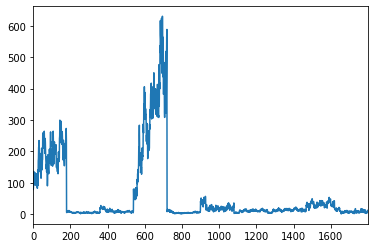

In [9]:
costs['costs'].plot()

### Поиск и обработка дубликатов  

Найдем сумму явных дубликатов во всех таблицах.

In [10]:
display(visits.duplicated().sum())
display(orders.duplicated().sum())
display(costs.duplicated().sum())

0

0

0

### Создание функций   

Зададим функции для создания профилей пользователей, расчета и анализа LTV, ROI, удержания и конверсии, а также функции для визуализации этих метрик.

- **Функция для создания пользовательских профилей**


In [11]:

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


- **Функция для расчёта удержания**

In [12]:

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

- **Функция для расчёта конверсии**

In [13]:

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

- **Функция для расчёта LTV и ROI**

In [14]:

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

- **Функция для сглаживания фрейма**

In [15]:

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

- **Функция для визуализации удержания**

In [16]:

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

- **Функция для визуализации конверсии**

In [17]:

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

- **функция для визуализации LTV и ROI**

In [18]:

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Вывод  

Названия столбцов были приведены к единому стилю написания.

Некорректные значения и дубликаты не обнаружены.

В столбцах с датами изменили тип данных на datetime.  

Задали функции для создания профилей пользователей, дальнейшего расчета и анализа LTV, ROI, удержания и конверсии.

## Исследовательский анализ данных <a id='4'></a>

### Профили пользователей  



- Получим профили пользователей

In [19]:
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


- Определим минимальную и максимальную даты привлечения пользователей

In [20]:
display(profiles['first_ts'].min())
display(profiles['first_ts'].max())

Timestamp('2019-05-01 00:00:41')

Timestamp('2019-10-27 23:59:04')

- Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей

In [21]:
#создадим таблицу, отражающую количество пользователей для каждой страны
profiles_groupby = profiles.groupby('region').agg({'user_id':'nunique'})

#создадим таблицу с кол-вом платящих для каждой страны
profiles_payers = profiles.loc[profiles.loc[:, 'payer'] == True].groupby('region').agg({'user_id':'nunique'})

#объединим таблицы
profiles_payers_perc = profiles_payers.merge(profiles_groupby, on='region', suffixes=('_payer','_all'))

#добавим процент платящих по каждой стране
profiles_payers_perc['percent'] = profiles_payers_perc['user_id_payer']/profiles_payers_perc['user_id_all'] * 100

#остсортируем проценты по убыванию и округлим значения до двух знаков после запятой
profiles_payers_perc.sort_values(by='percent', ascending=False).round(2)


,user_id_payer,user_id_all,percent
region,,,
United States,6902,100002,6.90
Germany,616,14981,4.11
UK,700,17575,3.98
France,663,17450,3.80


- Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи

In [22]:
#создадим таблицу, отражающую количество пользователей для каждого устройства
profiles_device_groupby = profiles.groupby('device').agg({'user_id':'nunique'})

#создадим таблицу с кол-вом платящих для каждого устройства
profiles_payers_device = profiles.loc[profiles.loc[:, 'payer'] == True].groupby('device').agg({'user_id':'nunique'})

#объединим таблицы
profiles_payers_device_perc = profiles_payers_device.merge(profiles_device_groupby, on='device', suffixes=('_payer','_all'))

#добавим процент платящих по каждому устройству
profiles_payers_device_perc['percent'] = profiles_payers_device_perc['user_id_payer']/profiles_payers_device_perc['user_id_all'] * 100

#остсортируем проценты по убыванию и округлим значения до двух знаков после запятой
profiles_payers_device_perc.sort_values(by='percent', ascending=False).round(2)

,user_id_payer,user_id_all,percent
device,,,
Mac,1912,30042,6.36
iPhone,3382,54479,6.21
Android,2050,35032,5.85
PC,1537,30455,5.05


- Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей

In [23]:
#создадим таблицу, отражающую количество пользователей для каждого канала
profiles_channel_groupby = profiles.groupby('channel').agg({'user_id':'nunique'})

#создадим таблицу с кол-вом платящих для каждого канала
profiles_payers_channel = profiles.loc[profiles.loc[:, 'payer'] == True].groupby('channel').agg({'user_id':'nunique'})

#объединим таблицы
profiles_payers_channel_perc = profiles_payers_channel.merge(profiles_channel_groupby, on='channel', suffixes=('_payer','_all'))

#добавим процент платящих по каждому каналу
profiles_payers_channel_perc['percent'] = profiles_payers_channel_perc['user_id_payer']/profiles_payers_channel_perc['user_id_all'] * 100

#остсортируем проценты по убыванию и округлим значения до двух знаков после запятой
profiles_payers_channel_perc.sort_values(by='percent', ascending=False).round(2)

,user_id_payer,user_id_all,percent
channel,,,
FaceBoom,3557,29144,12.20
AdNonSense,440,3880,11.34
lambdaMediaAds,225,2149,10.47
TipTop,1878,19561,9.60
RocketSuperAds,352,4448,7.91
WahooNetBanner,453,8553,5.30
YRabbit,165,4312,3.83
MediaTornado,156,4364,3.57
LeapBob,262,8553,3.06


**Вывод**  

Больше всего пользователей из United States- 100002, доля платящих - 6.90%.   
Самые популярные каналы из которых приходят покупатели - это FaceBoom и TipTop - 29144 и 19561 пользователей соответственно, у FaceBoom самый большой процент платящих - 12.20%, а TipTop по доле платящих только на 4 месте.

### Бизнес-показатели  

- Посчитаем общую сумму расходов на рекламу 

In [24]:
#выведем общую сумму расходов на рекламу
costs_all = costs['costs'].sum().round(2)
costs_all

105497.3

- Визуализируем изменения расходов по месяцам

In [25]:
#добавим в таблицу столбцы отдельно с месяцем расходов
costs['month'] = pd.DatetimeIndex(costs['dt']).month

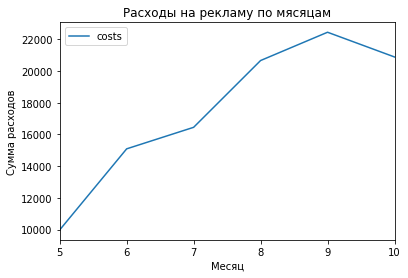

In [26]:
#построим график, отображающий расходы по месяцам

costs.groupby('month').agg({'costs':'sum'}).plot()
plt.xlabel('Месяц')
plt.ylabel('Сумма расходов')
plt.title('Расходы на рекламу по мясяцам');

- Выясним, как траты распределены по источникам

In [27]:
#посчитаем сумму расходов на рекламу для каждого канала
costs_channel_groupby = costs.groupby('channel').agg({'costs':'sum'})
costs_channel_groupby.sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


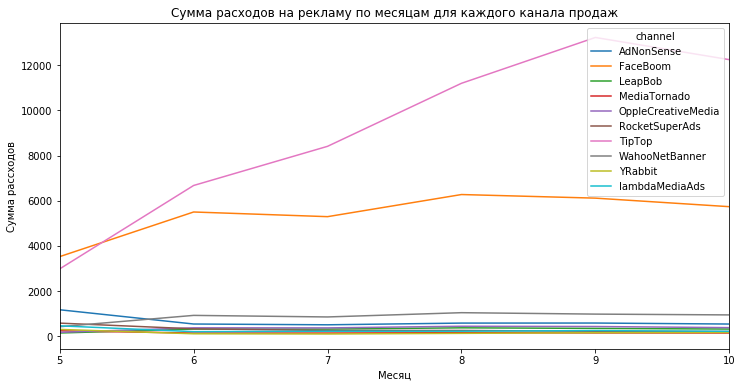

In [28]:
#визуализируем затраты на рекламу по каждому каналу в разбивке по месяцам

costs.pivot_table(index=['month'], columns='channel', values='costs', aggfunc='sum')\
              .plot(xlim=(5, 10), figsize=(12,6))
plt.title('Сумма расходов на рекламу по месяцам для каждого канала продаж')
plt.xlabel('Месяц')
plt.ylabel('Сумма рассходов');

**Вывод**  

На первом графике можно заметить, что расходы на рекламу с мая по сентябрь с каждым месяцем только растут, в октябре немного снижаются. Больше всего затрат на рекламу в TipTop	и FaceBoom. Также на втором графике четко отображается, что основное увеличение бюджета на рекламу по месяцам происходит только для канала TipTop.

### Расчет САС

Узнаем, сколько в среднем стоило привлечение одного пользователя из каждого источника.   

Нужно исключить пользователей с органическим трафиком, так как компания за них ничего не платит.

In [29]:
#исключим из таблицы profiles органических пользователей
profiles = profiles.query('channel != "organic"')

- Рассчитайем средний CAC на одного пользователя для всего проекта

In [30]:
cac_all = profiles['acquisition_cost'].sum()/profiles['user_id'].count()
cac_all.round(2)

1.13

- Рассчитайем средний CAC на одного пользователя для каждого источника трафика

In [31]:
#сгруппируем таблицу profiles и найдем общую стоимость привлечения для каждого канала, 
#а также кол-во пользователей в группе
cac_channel = profiles.groupby('channel').agg({'acquisition_cost':'sum', 'user_id':'count'})

#посчитаем среднюю стоимость привлечения пользователей для каждого канала
cac_channel['cac_mean'] = cac_channel['acquisition_cost']/cac_channel['user_id']

#отсортируем по среднему по убыванию
cac_channel.sort_values(by='cac_mean', ascending=False).round(2)

,acquisition_cost,user_id,cac_mean
channel,,,
TipTop,54751.30,19561,2.80
FaceBoom,32445.60,29144,1.11
AdNonSense,3911.25,3880,1.01
lambdaMediaAds,1557.60,2149,0.72
WahooNetBanner,5151.00,8553,0.60
RocketSuperAds,1833.00,4448,0.41
OppleCreativeMedia,2151.25,8605,0.25
YRabbit,944.22,4312,0.22
MediaTornado,954.48,4364,0.22


**Вывод**  

В среднем стоимость привлечения одного пользователя для всего проекта состовляет 1.13 Если посмотреть на разбивку по каналам, то опять видим, что самые большие инвестиции в маркетинг на канале TipTop - 2.8, что чуть больше, чем в 2 раза выше среднего.

### Оценка окупаемости рекламы  

#### Проанализируем общую окупаемость рекламы. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.  

Будем считать, что на календаре 1 ноября 2019 года - это момент анализа.  
В бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения (14 дней) - это горизонт анализа.  

In [32]:
#зададим момент анализа и горизонт анализа
observation_date = datetime(2020, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

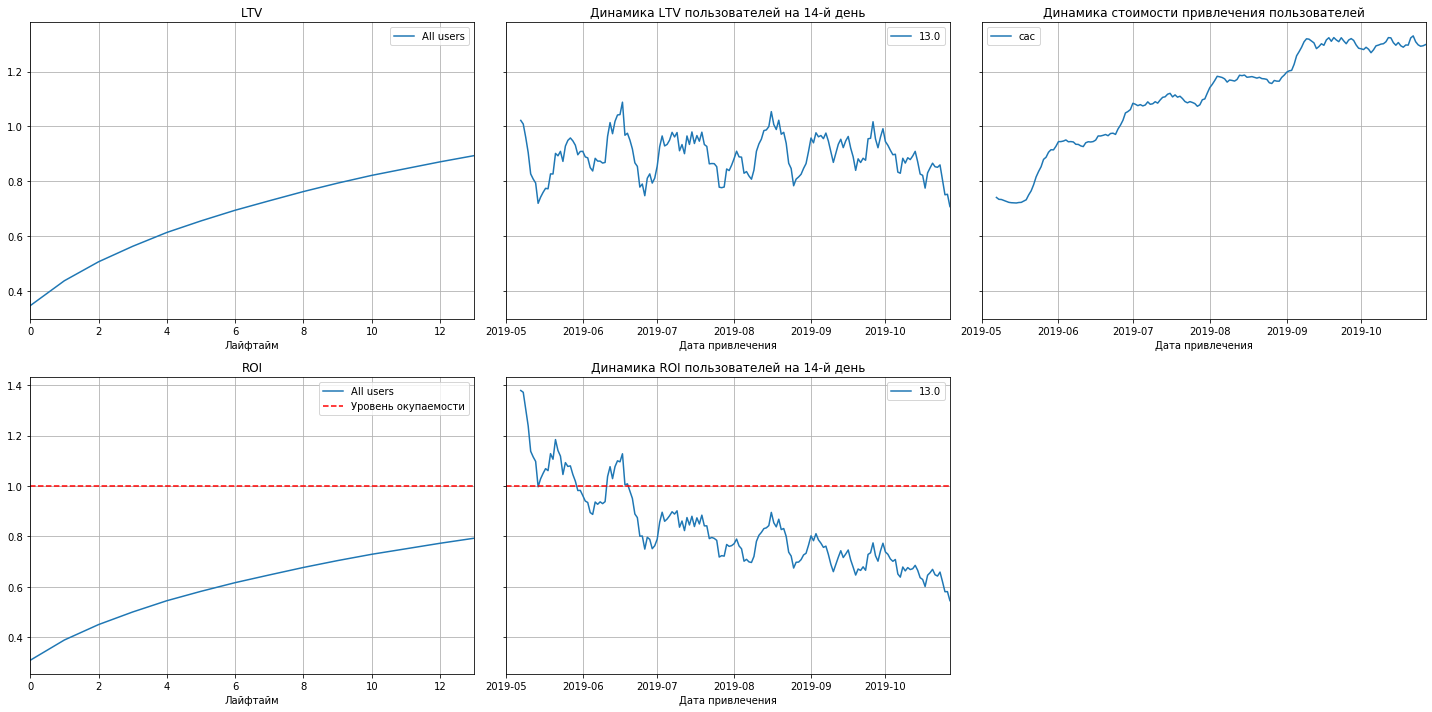

In [33]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Реклама не окупается.  
Динамика стоимости привлечения пользователей постоянно растет - это может быть причиной убытков.  
LTV стабильно растет, следовательно качество пользователей не влияет на убытки.  
Процент окупаемости клиентов на 14-й день с каждым месяцем падает.  

#### Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

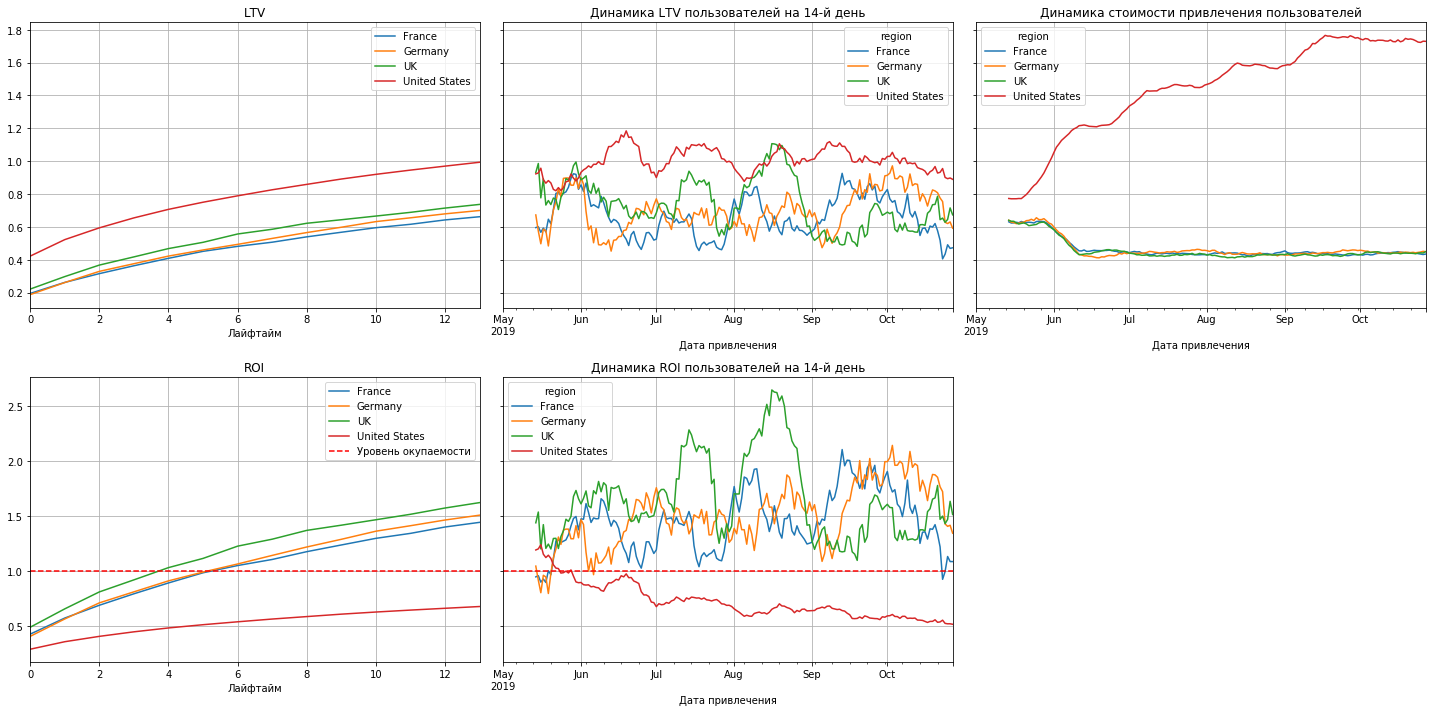

In [34]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Теперь можно заметить, что во всех странах кроме United States реклама окупается.  
Динамика стоимости привлечения пользователей для United States постоянно растет и схожа с общей динамикой, возможно расходы на рекламу увеличиваются, а количество пользователей не прибавляется.  
Процент окупаемости клиентов на 14-й день с каждым месяцем падает тоже только для United States.   

#### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

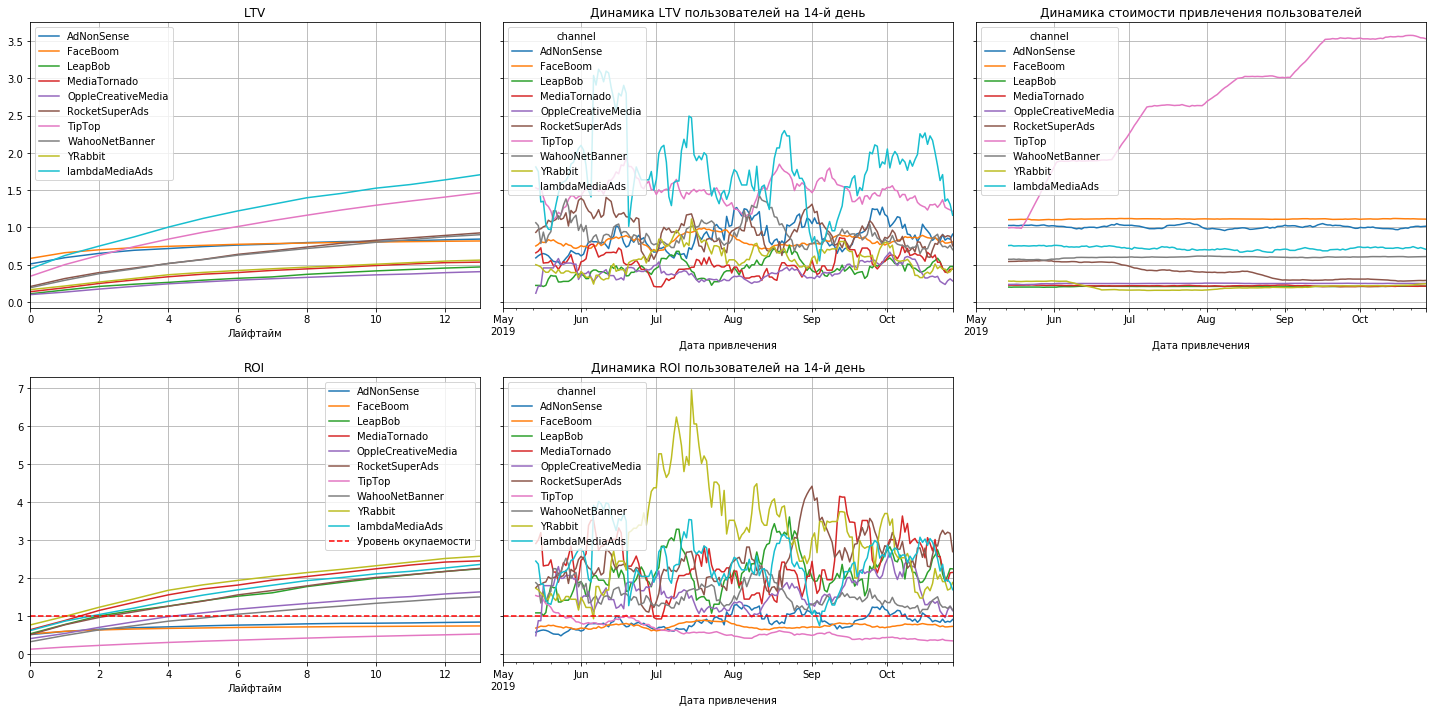

In [35]:
# смотрим окупаемость с разбивкой по рекламным каналам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Реклама не окупается для трех каналов: TipTop, FaceBoom и AdNonSense. В эти каналы идет больше всего расходов на рекламу.  
Возможно пользователи этих приложений в основном из United States, поэтому мы видим изменения на графике в разбивке по странам.

In [36]:
#создадим сводную таблицу, чтобы посмотреть кол-во пользователей разных каналов по странам
profiles.pivot_table(index=['region'], columns='channel', values='user_id', aggfunc='count')

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
region,,,,,,,,,,
France,1366.0,NaN,2988.0,NaN,2991.0,NaN,NaN,2971.0,NaN,742.0
Germany,1219.0,NaN,2519.0,NaN,2562.0,NaN,NaN,2579.0,NaN,649.0
UK,1295.0,NaN,3046.0,NaN,3052.0,NaN,NaN,3003.0,NaN,758.0
United States,NaN,29144.0,NaN,4364.0,NaN,4448.0,19561.0,NaN,4312.0,NaN


Все пользователи приложений TipTop и FaceBoom из United States.

#### Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

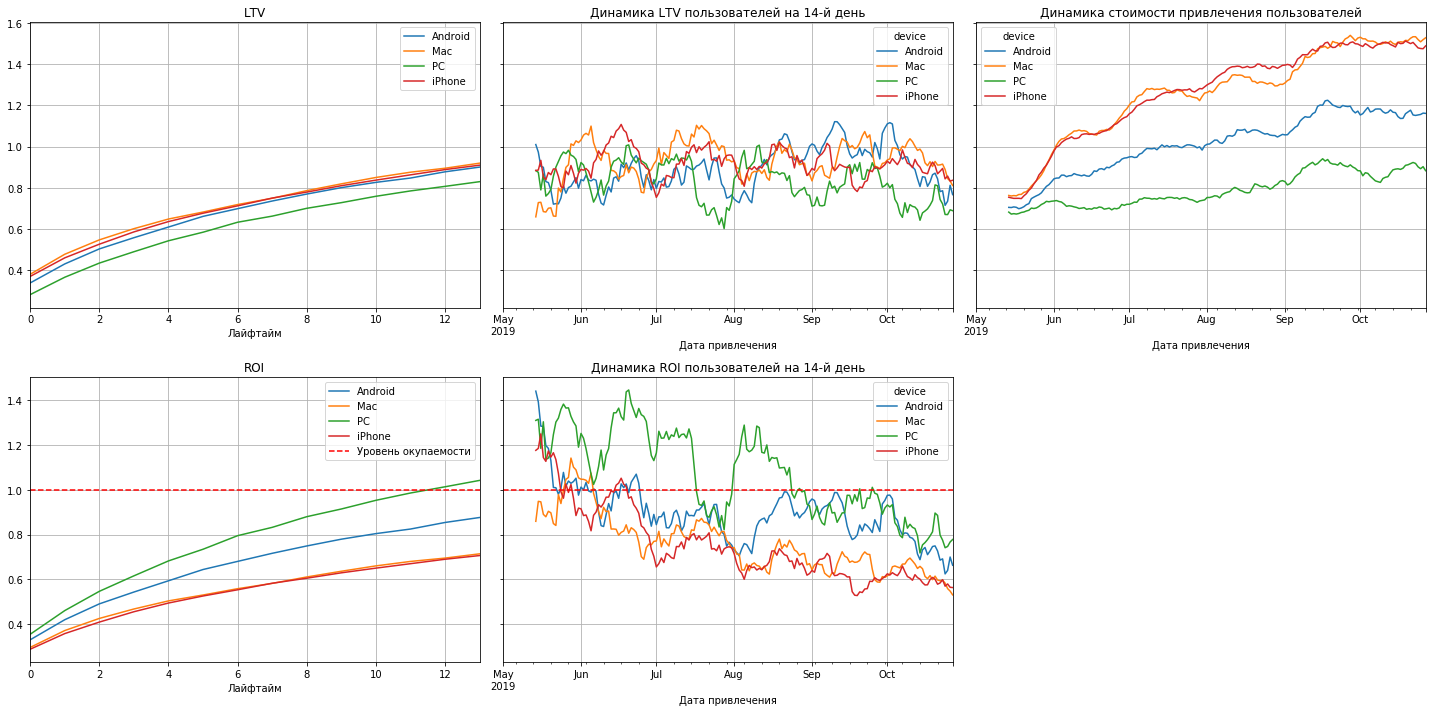

In [37]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Видим, что реклама не окупается для всех устройств кроме PC.  
Но динамика стоимости привлечения пользователей идентична для всех устройств, скорее всего тип устройства не влияет на окупаемость рекламы.

**Вывод**  
Проанализировав все графики, мы видим, что реклама не окупается только для пользователей TipTop, FaceBoom и AdNonSense, большая часть которых из United States. Возможно причина этого в низкой конверсии или низком удержании.

###  Оценка конверсии и Retention Rate

- Построим и изучим графики конверсии и удержания с разбивкой по каналам: 

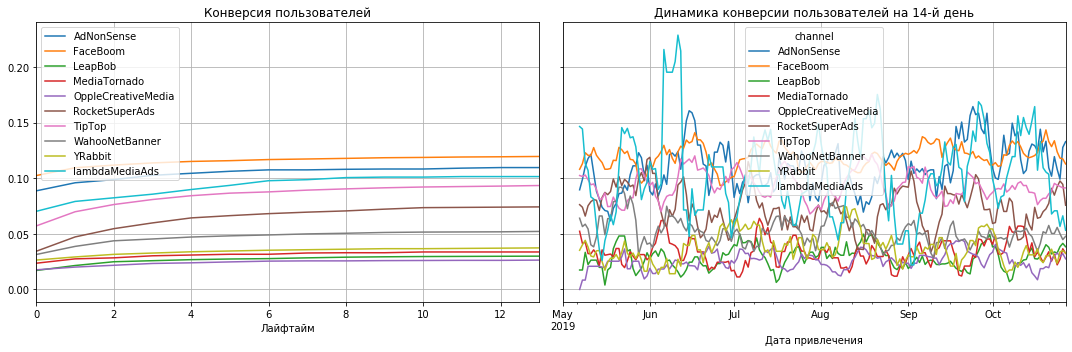

In [38]:
# смотрим конверсию с разбивкой по рекламным каналам

dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

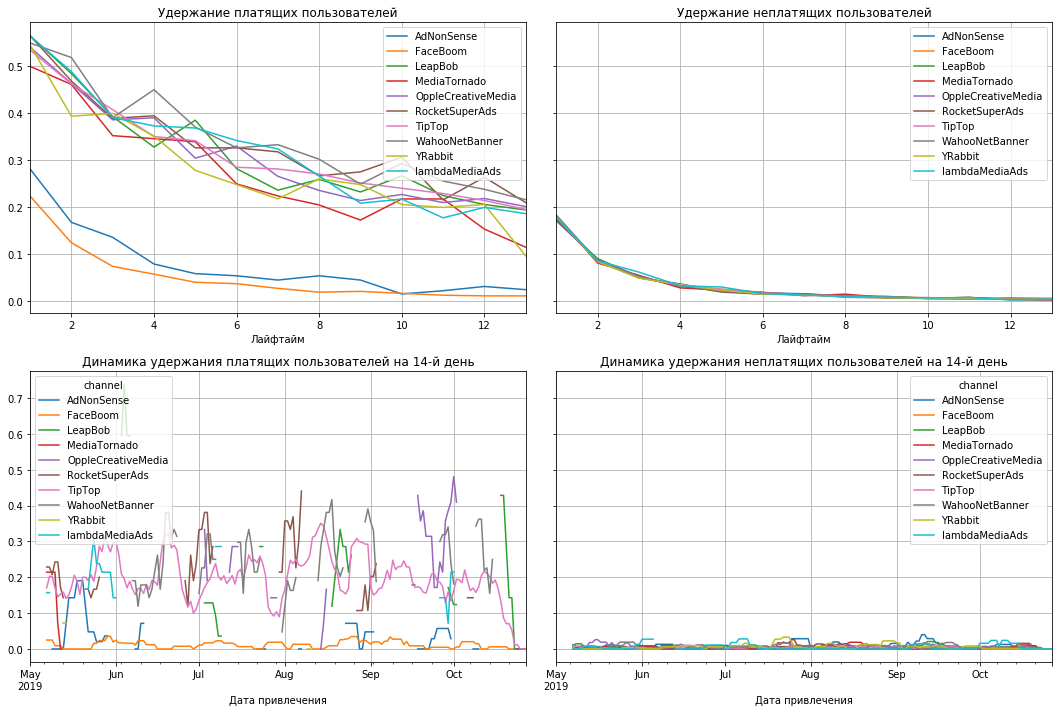

In [39]:
# смотрим удержание с разбивкой по рекламным каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

По графикам видно, что все пользователи конвертируются хорошо и постоянно, а вот на графике удержания выделяются пользователи как раз таких каналов как AdNonSense и FaceBoom, коэффициент удержания самый низкий и постоянно падает. Динамика удержания на 14-й день в FaceBoom практически на нуле для всех месяцев.  

Пользователи TipTop конвертируются и удерживаются хорошо, возможно, причина не окупаемости рекламы в слишком больших вложениях в рекламу.

- Построим и изучим графики конверсии и удержания с разбивкой по устройствам:

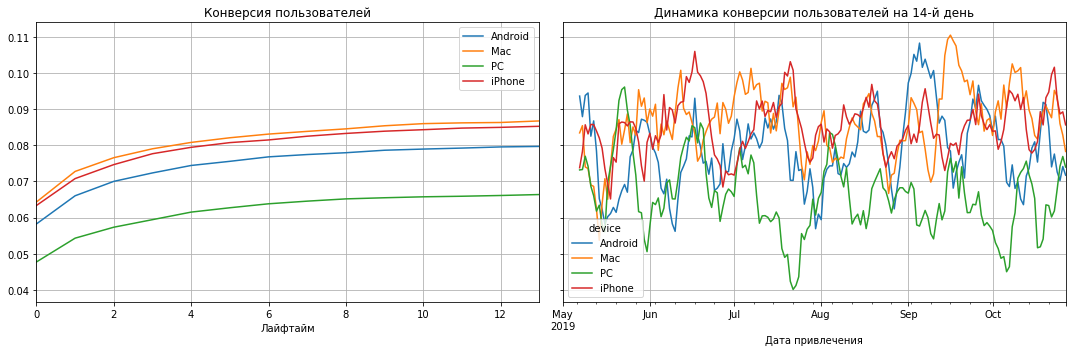

In [40]:
# смотрим конверсию с разбивкой по устройствам

dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

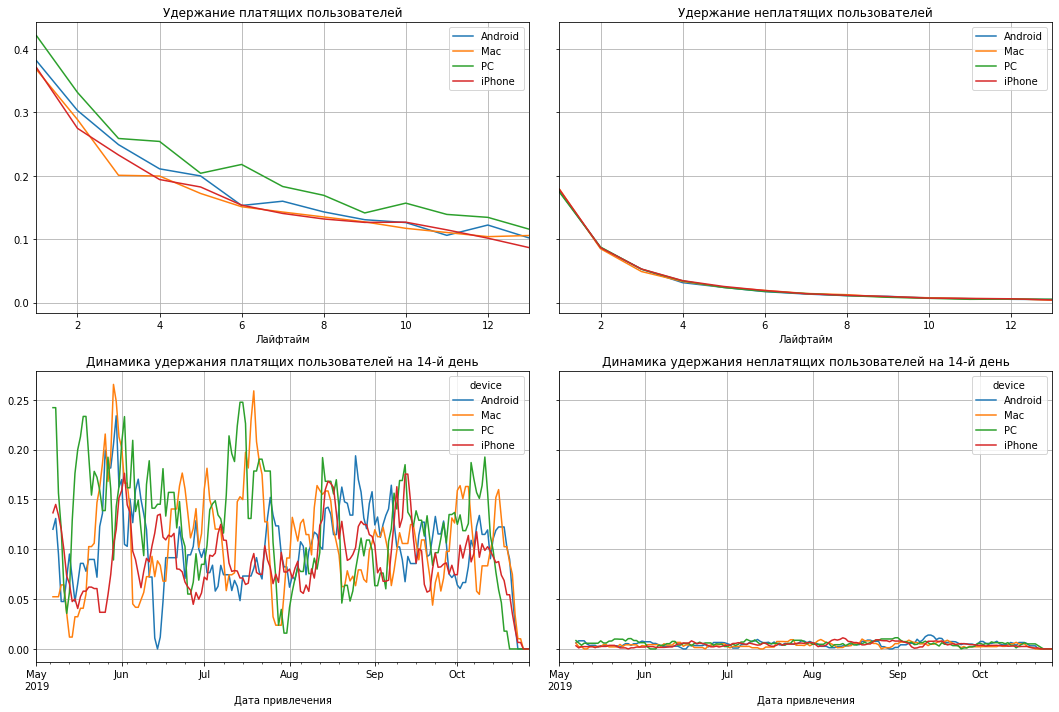

In [41]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Ничего необычного, все пользователи конвертируются хорошо.

- Построим и изучим графики конверсии и удержания с разбивкой по странам:

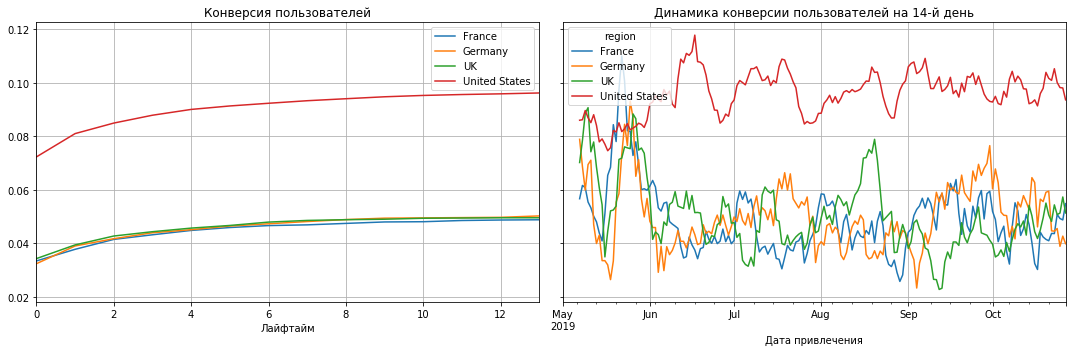

In [42]:
# смотрим конверсию с разбивкой по странам

dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

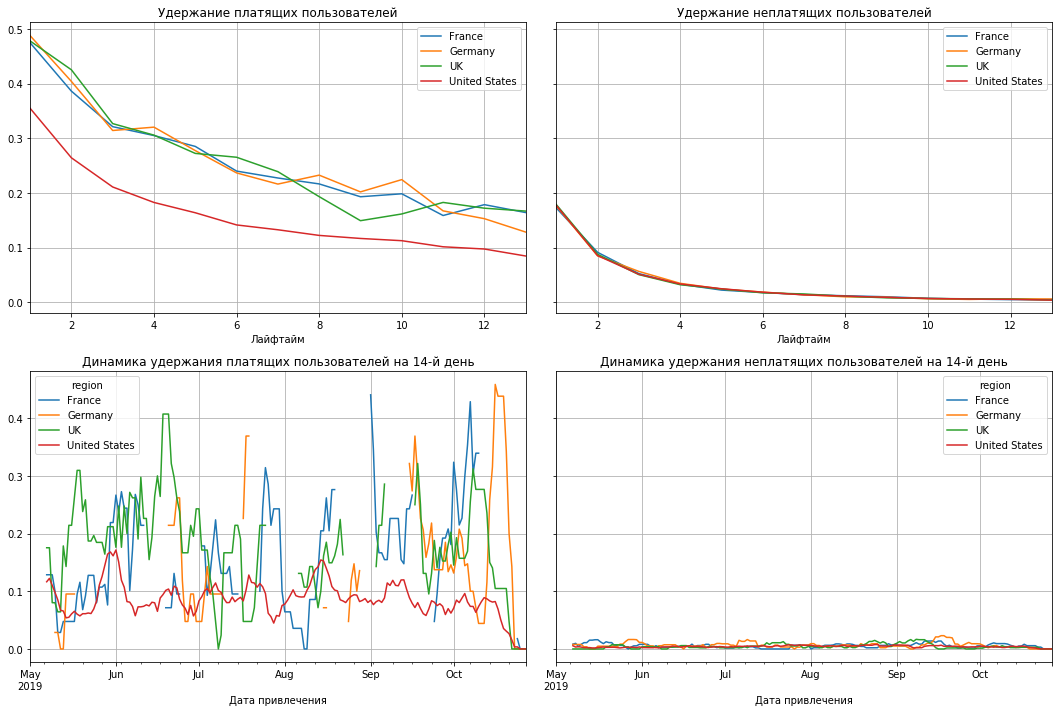

In [43]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Удержание пользователей из United States "провисает" относительно других стран, но это как мы выяснили связано с каналом привлечения пользователей, а не со страной.

**Вывод**  

Все пользователи конвертируются хорошо и постоянно, на графиках удержания самый низкий коэффициент у пользователи каналов TipTop и FaceBoom, так как все они из United States, то это заметно и на графике с разделением по странам.

Следовательно расходы на рекламу были увеличены в каналах с низким коэффициентом удержания.

## Итоги исследования  <a id='5'></a>

Прежде чем исследовать данные и разобраться в причинах, которые вызывают убытки в компании, мы ознакомились с данными, проверили их корректность, привели к единому стилю написание столбцов, изменили некоторые типы данных.

Исследуя данные, определили что:  
- Больше всего пользователей из United States. Наибольший процент платящих из United States и с платформы FaceBoom.
- Больше всего затрат на рекламу уходит в TipTop и FaceBoom. Увеличение бюджета на рекламу по месяцам происходит только для канала TipTop.  
- В среднем стоимость привлечения одного пользователя для всего проекта состовляет 1.13 Cамые большие инвестиции в маркетинг на канале TipTop - 2.8. 
- Реклама не окупается для трех каналов: TipTop, FaceBoom и AdNonSense. Одновременно с этим, в эти каналы идет больше всего расходов на рекламу.  
- Все пользователи конвертируются хорошо и постоянно, а вот коэффициент удержания переходящих с TipTop и FaceBoom самый низкий и постоянно падает.  
- Расходы на рекламу постоянно увеличивались в самые популярные каналы, но с низким коэффициентом удержания пользователей. Возможно причины неэффективности привлечения пользователей в этих каналах заключается в возрасте пользователей - преобладающее кол-во детей или тинейджеров, если это не основная возрастная категория для приложения Procrastinate Pro+. 
- Отделу маркетинга для повышения эффективности рекомендуется:  
    - увеличивать расходы на рекламу в каналы с окупаемой рекламой и с высоким коэффициентом удержания пользователей - например, lambdaMediaAds, YRabbit и MediaTornado;
    - увеличивать расходы на рекламу в каналы со схожей аудиторией;
    - сделать уклон в привлечении пользователей из европейских стран.